In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import csv
from nn import ANNClassification, ANNRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import OneHotEncoder, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_curve, auc, precision_recall_curve, log_loss, confusion_matrix, precision_score, recall_score, f1_score
from multinomial import MultinomialLogReg
from sklearn.linear_model import LogisticRegression, LinearRegression


sns.set()

housing3 = pd.read_csv('housing3.csv')
# housing2r


In [2]:
def bootstrap(a):
    means = []
    for i in range(1000):
        means.append(np.mean(np.random.choice(a, len(a), replace=True)))
    
    return np.mean(means), np.std(means)

# 3) classification

In [20]:
#split 
metrics = {}

names = ["ANN", "MLPClassifier", "MultinomialLogReg_HW3", "LogisticRegression"]


precision_scores = {}
recall_scores = {}
f1_scores = {}
logloss_scores = {}


for i in range(100):


    X_train, X_test, y_train, y_test = train_test_split(housing3.drop(columns='Class'), housing3['Class'], train_size=0.8)

    X_train = normalize(X_train)
    X_test = normalize(X_test)
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()

    multinomial_regression = MultinomialLogReg()
    multinomial_regression.build(X_train, y_train)


    fitter = ANNClassification(units=[20, 20], lambda_=0.0001)
    m = fitter.fit(X_train, y_train, epochs=1)

    sk_fitter = MLPClassifier(hidden_layer_sizes=(20, 20), activation="relu", max_iter=1000, alpha=0.0001, solver='lbfgs')
    sk_m = sk_fitter.fit(X_train, y_train)
    preds = sk_m.predict_proba(X_test)


    logistic_regression = LogisticRegression()
    logistic_regression.fit(X_train, y_train)

    y_tes_onehot = m.encoder.transform(y_test.reshape(-1, 1)).toarray()

    
    predictions = {}
    predictions["ANN"] = m.predict(X_test)
    predictions["MLPClassifier"] = sk_m.predict_proba(X_test)
    predictions["MultinomialLogReg_HW3"] = multinomial_regression.predict(X_test)
    predictions["LogisticRegression"] = logistic_regression.predict_proba(X_test)
    # precision, recall, logloss

    abs_preds = {}
    for name, pred in predictions.items():
        abs_preds[name] = np.argmax(-pred, axis=1),

    scores = {}

    prec = {}
    rec = {}
    f1_row = {}
    ll = {}

    for name, pred in abs_preds.items():

        precision = precision_score(y_tes_onehot[:, 0], pred[0], average='weighted')
        recall = recall_score(y_tes_onehot[:, 0], pred[0], average='weighted')
        f1 = f1_score(y_tes_onehot[:, 0], pred[0], average='weighted')
        logloss = log_loss(y_tes_onehot, predictions[name])

        prec[name] = np.round(precision, 4)
        rec[name] = np.round(recall, 4)
        f1_row[name] = np.round(f1, 4)
        ll[name] = np.round(logloss, 4)




    precision_scores[str(i)] = prec 
    recall_scores[str(i)] = rec
    f1_scores[str(i)] = f1_row
    logloss_scores[str(i)] = ll



dfz = pd.DataFrame.from_dict(precision_scores).T
dfz.to_csv("precision_scores.csv", index=False)

dfz = pd.DataFrame.from_dict(recall_scores).T
dfz.to_csv("recall_scores.csv", index=False)

dfz = pd.DataFrame.from_dict(f1_scores).T
dfz.to_csv("f1_scores.csv", index=False)

dfz = pd.DataFrame.from_dict(logloss_scores).T
dfz.to_csv("logloss_scores.csv", index=False)



In [9]:
names = ["ANN", "MLPClassifier", "MultinomialLogReg_HW3", "LogisticRegression"]
models = [fitter, sk_m, multinomial_regression, logistic_regression]



predictions = {}
predictions["ANN"] = m.predict(X_test)
predictions["MLPClassifier"] = sk_m.predict_proba(X_test)
predictions["MultinomialLogReg_HW3"] = multinomial_regression.predict(X_test)
predictions["LogisticRegression"] = logistic_regression.predict_proba(X_test)


n = m.encoder.transform(y_test.reshape(-1, 1)).toarray()
y_tes_onehot = m.encoder.transform(y_test.reshape(-1, 1)).toarray()

ANN
MLPClassifier
MultinomialLogReg_HW3
LogisticRegression


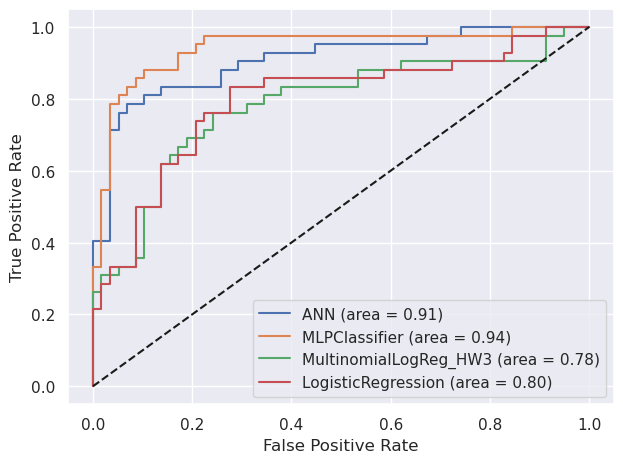

In [39]:
roc_auc = {}

plt.figure()
for name, pred in predictions.items():
    print(name)
    fpr, tpr, thesholds = roc_curve(y_tes_onehot[:, 0], pred[:, 0])
    roc_auc[name] = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc[name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()

plt.savefig('report/figures/roc_curve.pdf')

In [47]:
# precision, recall, logloss

abs_preds = {}
for name, pred in predictions.items():
    abs_preds[name] = np.argmax(-pred, axis=1)


In [63]:

scores = {}

for name, pred in abs_preds.items():
    precision = precision_score(y_tes_onehot[:, 0], pred, average='weighted')
    recall = recall_score(y_tes_onehot[:, 0], pred, average='weighted')
    f1 = f1_score(y_tes_onehot[:, 0], pred, average='weighted')
    logloss = log_loss(y_tes_onehot, predictions[name])

    scores[name] = {"precision": np.round(precision, 2), "recall": np.round(recall, 2), "f1": np.round(f1,2 ), "logloss": np.round(logloss, 2)}


df_scores = pd.DataFrame(scores).T
df_scores.to_csv('report/classification_scores.csv')

<Figure size 640x480 with 0 Axes>

In [15]:
df_prec = pd.read_csv("precision_scores.csv")
df_rec = pd.read_csv("recall_scores.csv")
df_f1 = pd.read_csv("f1_scores.csv")
df_logloss = pd.read_csv("logloss_scores.csv")

dfs = [df_prec, df_rec, df_f1, df_logloss]

metric = ["Precision", "Recall", "f1", "Log-Loss"]

table = {}
stds = {}
for i, df in enumerate(dfs):
    table[metric[i]] = df.mean().round(2)
    stds[metric[i]] = df.std().round(2)

df_table = pd.DataFrame(table)
df_table
df_table.to_csv('report/classification_scores.csv')

df_stds = pd.DataFrame(stds)
df_stds.to_csv('report/classification_scores_stds.csv')

# 2) Numerical gradient

In [2]:
x = np.array([[0, 0, 2],
                        [0, 1, 3],
                        [1, 0, 2],
                        [1, 1, 2]])
y = np.array([0, 1, 1, 0])

error_class = []
error_reg = []
for i in range(100):

    encoder = OneHotEncoder(handle_unknown='ignore')
    y_ohe = encoder.fit_transform(y.reshape(-1, 1)).toarray() #target value encoding
    fitter2 = ANNClassification(units=[3, 10, 10, 10, 2], lambda_=0.0001)
    fitter2.initialize_weight()

    gradient = fitter2.gradient(fitter2.flatten_params(), x, y_ohe)
    numerical_gradient = fitter2.compute_numerical_gradient(x, y_ohe)

    diff = np.linalg.norm(gradient - numerical_gradient)
    error_class.append(diff)
    # print(gradient)
    # print(numerical_gradient)
    print("Gradient difference for Classification: ", np.linalg.norm(gradient - numerical_gradient))

    fitter2 = ANNRegression(units=[3, 10, 10, 10, 1], lambda_=0.0001)
    fitter2.initialize_weight()
    gradient = fitter2.gradient(fitter2.flatten_params(), x, y)
    numerical_gradient = fitter2.compute_numerical_gradient(x, y)

    diff = np.linalg.norm(gradient - numerical_gradient)
    error_reg.append(diff)
    print("Gradient difference for Regression: ", np.linalg.norm(gradient - numerical_gradient))


Gradient difference for Classification:  0.8576025607738427
Gradient difference for Regression:  1.1157622350639052
Gradient difference for Classification:  0.2247749205932926
Gradient difference for Regression:  3.023645214296725
Gradient difference for Classification:  0.796775646459886
Gradient difference for Regression:  3.822499052234257
Gradient difference for Classification:  0.5013272064596951
Gradient difference for Regression:  2.7011658002234595
Gradient difference for Classification:  0.538524293255474
Gradient difference for Regression:  1.3200683977684535
Gradient difference for Classification:  1.1979922208081255
Gradient difference for Regression:  1.4589930846624286
Gradient difference for Classification:  1.3910507844290232
Gradient difference for Regression:  5.019770020658116
Gradient difference for Classification:  1.0531407295670443
Gradient difference for Regression:  0.09631180758205626
Gradient difference for Classification:  1.3983721597679524
Gradient differe

In [7]:
print("class:", bootstrap(error_class))
print("reg:", bootstrap(error_reg))

class: (0.914048406440065, 0.0447573320654469)
reg: (2.1775659079953216, 0.18480696322547213)


In [5]:
print(np.std(error_class))
print(np.std(error_reg))

0.43230841693147365
1.8481201288021467


In [3]:
print("average error for Classification: ", np.mean(error_class))
print("average error for Regression: ", np.mean(error_reg))

average error for Classification:  0.9123708377775814
average error for Regression:  2.1754415905824667


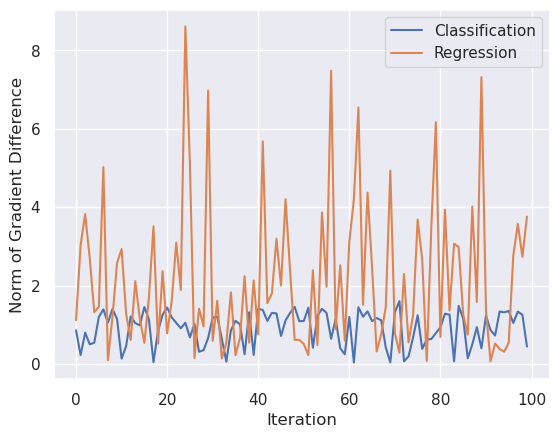

In [4]:

plt.plot(error_class, label='Classification')
plt.plot(error_reg, label='Regression')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Norm of Gradient Difference')
plt.savefig('report/figures/grad_verification.pdf')

# 3) Regression

In [78]:
housing = pd.read_csv('housing2r.csv')

mses = {}
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(housing.drop(columns='y'), housing['y'], train_size=0.7)

    X_train = normalize(X_train)
    X_test = normalize(X_test)
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()


    fitter_regressor = ANNRegression(units=[20, 20], lambda_=0.0001)
    m = fitter_regressor.fit(X_train, y_train)

    sk_regressor = MLPRegressor(hidden_layer_sizes=(20, 20), activation="relu", max_iter=1000, alpha=0.0001, solver='lbfgs')
    sk_m = sk_regressor.fit(X_train, y_train)

    linear_regression = LinearRegression()
    linear_regression.fit(X_train, y_train)

    predictions = {}
    predictions["ANNRegression"] = m.predict(X_test)
    predictions["MLPRegressor"] = sk_m.predict(X_test)
    predictions["LinearRegression"] = linear_regression.predict(X_test)

    mses[str(i)] = {"ANNRegression": np.round(mean_squared_error(y_test, predictions["ANNRegression"]), 2), "MLPRegressor": np.round(mean_squared_error(y_test, predictions["MLPRegressor"]), 2), "LinearRegression": np.round(mean_squared_error(y_test, predictions["LinearRegression"]), 2)}


print(mses)

df_mse = pd.DataFrame(mses).T
df_mse.to_csv('report/regression_scores.csv')


/home/aljaz/miniforge3/envs/mlds/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'0': {'ANNRegression': 16.98, 'MLPRegressor': 16.17, 'LinearRegression': 15.93}, '1': {'ANNRegression': 48.13, 'MLPRegressor': 47.65, 'LinearRegression': 49.03}, '2': {'ANNRegression': 43.64, 'MLPRegressor': 43.57, 'LinearRegression': 43.54}, '3': {'ANNRegression': 18.45, 'MLPRegressor': 31.77, 'LinearRegression': 20.51}, '4': {'ANNRegression': 53.67, 'MLPRegressor': 51.59, 'LinearRegression': 52.36}, '5': {'ANNRegression': 33.88, 'MLPRegressor': 32.72, 'LinearRegression': 32.73}, '6': {'ANNRegression': 32.37, 'MLPRegressor': 77.44, 'LinearRegression': 25.55}, '7': {'ANNRegression': 17.01, 'MLPRegressor': 18.21, 'LinearRegression': 17.43}, '8': {'ANNRegression': 36.07, 'MLPRegressor': 37.03, 'LinearRegression': 35.58}, '9': {'ANNRegression': 42.56, 'MLPRegressor': 43.41, 'LinearRegression': 42.64}, '10': {'ANNRegression': 33.05, 'MLPRegressor': 32.81, 'LinearRegression': 33.61}, '11': {'ANNRegression': 44.08, 'MLPRegressor': 46.25, 'LinearRegression': 46.25}, '12': {'ANNRegression': 4

In [13]:
regressions = pd.read_csv('report/regression_scores.csv')
regressions = regressions.drop(columns='Unnamed: 0')


# 4) Create final predictions

In [3]:
y_test = pd.read_csv("final/y_test128.txt", header=None).to_numpy()
pred = pd.read_csv("final/predictions128.txt", header=None).to_numpy()
print("logloss: ",  log_loss(y_test, pred))

logloss:  0.5205877007352133
